# Part One: Network Models 

## 1. Watts-strogatz Networks

- Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#Creates an empty list p, which is going to contain the different graphs
p = []

#Sets the values of p in a list.
pval = [0, 0.1, 1]

#runs through all values of p, creating one graph for each and prints the average shortest path length for that give graph.
for x in range (0,len(pval)):
    p.insert(len(p),nx.watts_strogatz_graph(500, 4, pval[x]))
    print('Average shortest path length  for p=' + str(pval[x]) + ' is: ' + str(nx.average_shortest_path_length(p[x])))



Average shortest path length  for p=0 is: 62.875751503
Average shortest path length  for p=0.1 is: 7.95524649299
Average shortest path length  for p=1 is: 4.74550701403


In the above data it can be seen that the average shortest path length decreases, as the probability increases. 
This makes sense since a higher probability will provide more links in the graph and therefore make paths shorter.

- Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [4]:
#Create a list with all p values
pval = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

#Creates empty lists which are going to contain the standard deviation, sum of average shortest path length for each p
pstd = []
psum = []

#p is being used as a place holder for the average shortest path length of the 50 graphs for each value of p.
p = []

# this loop runs through all values in pval
for y in range (0, len(pval)):
    #This loop calculates the average shortest path length for 50 graphs, using the given p value
    for x in range (0,50):
        p.insert(len(p), nx.average_shortest_path_length(nx.watts_strogatz_graph(500, 4, pval[y])))
    #After 50 average short path lengths has been calculated, the standard deviation and the sum of these lengths are calculated.
    #p is reset in order to have an empty list for the 50 graphs of the next p value.
    pstd.insert(len(pstd), np.std(p))
    psum.insert(len(p), sum(p)/50)
    p = []

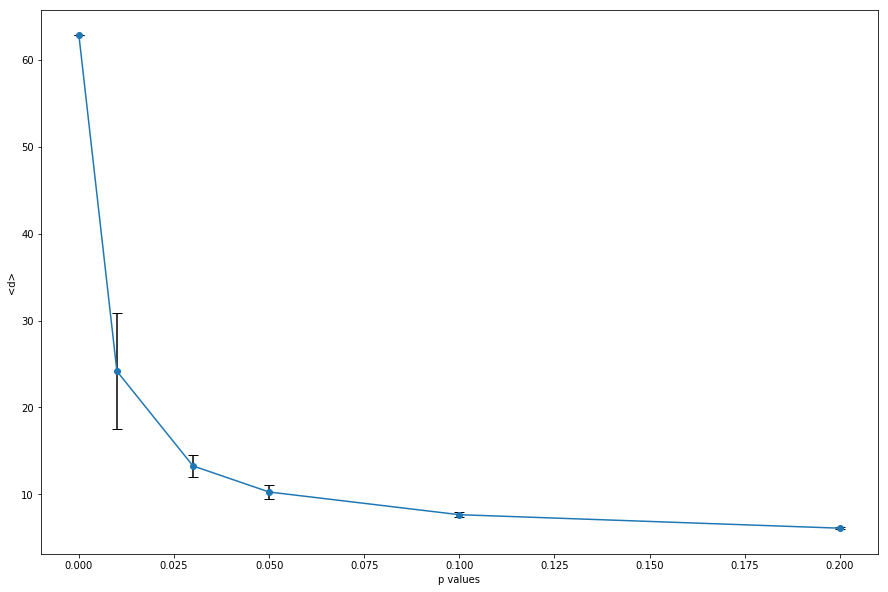

In [5]:
#This part sets the figure size of the plot and plots the average shortest path length for each of the p values.
fig = plt.figure(figsize = (15,10))
plt.errorbar(pval,psum,pstd,capsize = 5, fmt = 'o-', ecolor = 'black')
plt.xlabel('p values')
plt.ylabel('<d>')
plt.show()

In the above graph it can be seen that if the probability = 0 then there are no standard deviation. This is because there are no links, there is therefor no deviation.

The amount of links a graph has varies depending on the probability. A low probability therefore results in a small amount of links.
When multiple runs are done with the same probability, the graphs will have a different amount of links. By having a low amount of links the difference between the graphs becomes greater, percentage vise, than it would with a large amount of links.

This can also be conducted based on the above graph by having the standard deviation become smaller, when the probability becomes higher.
